(846, 19)
Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio', 'class'],
      dtype='object')
   compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162

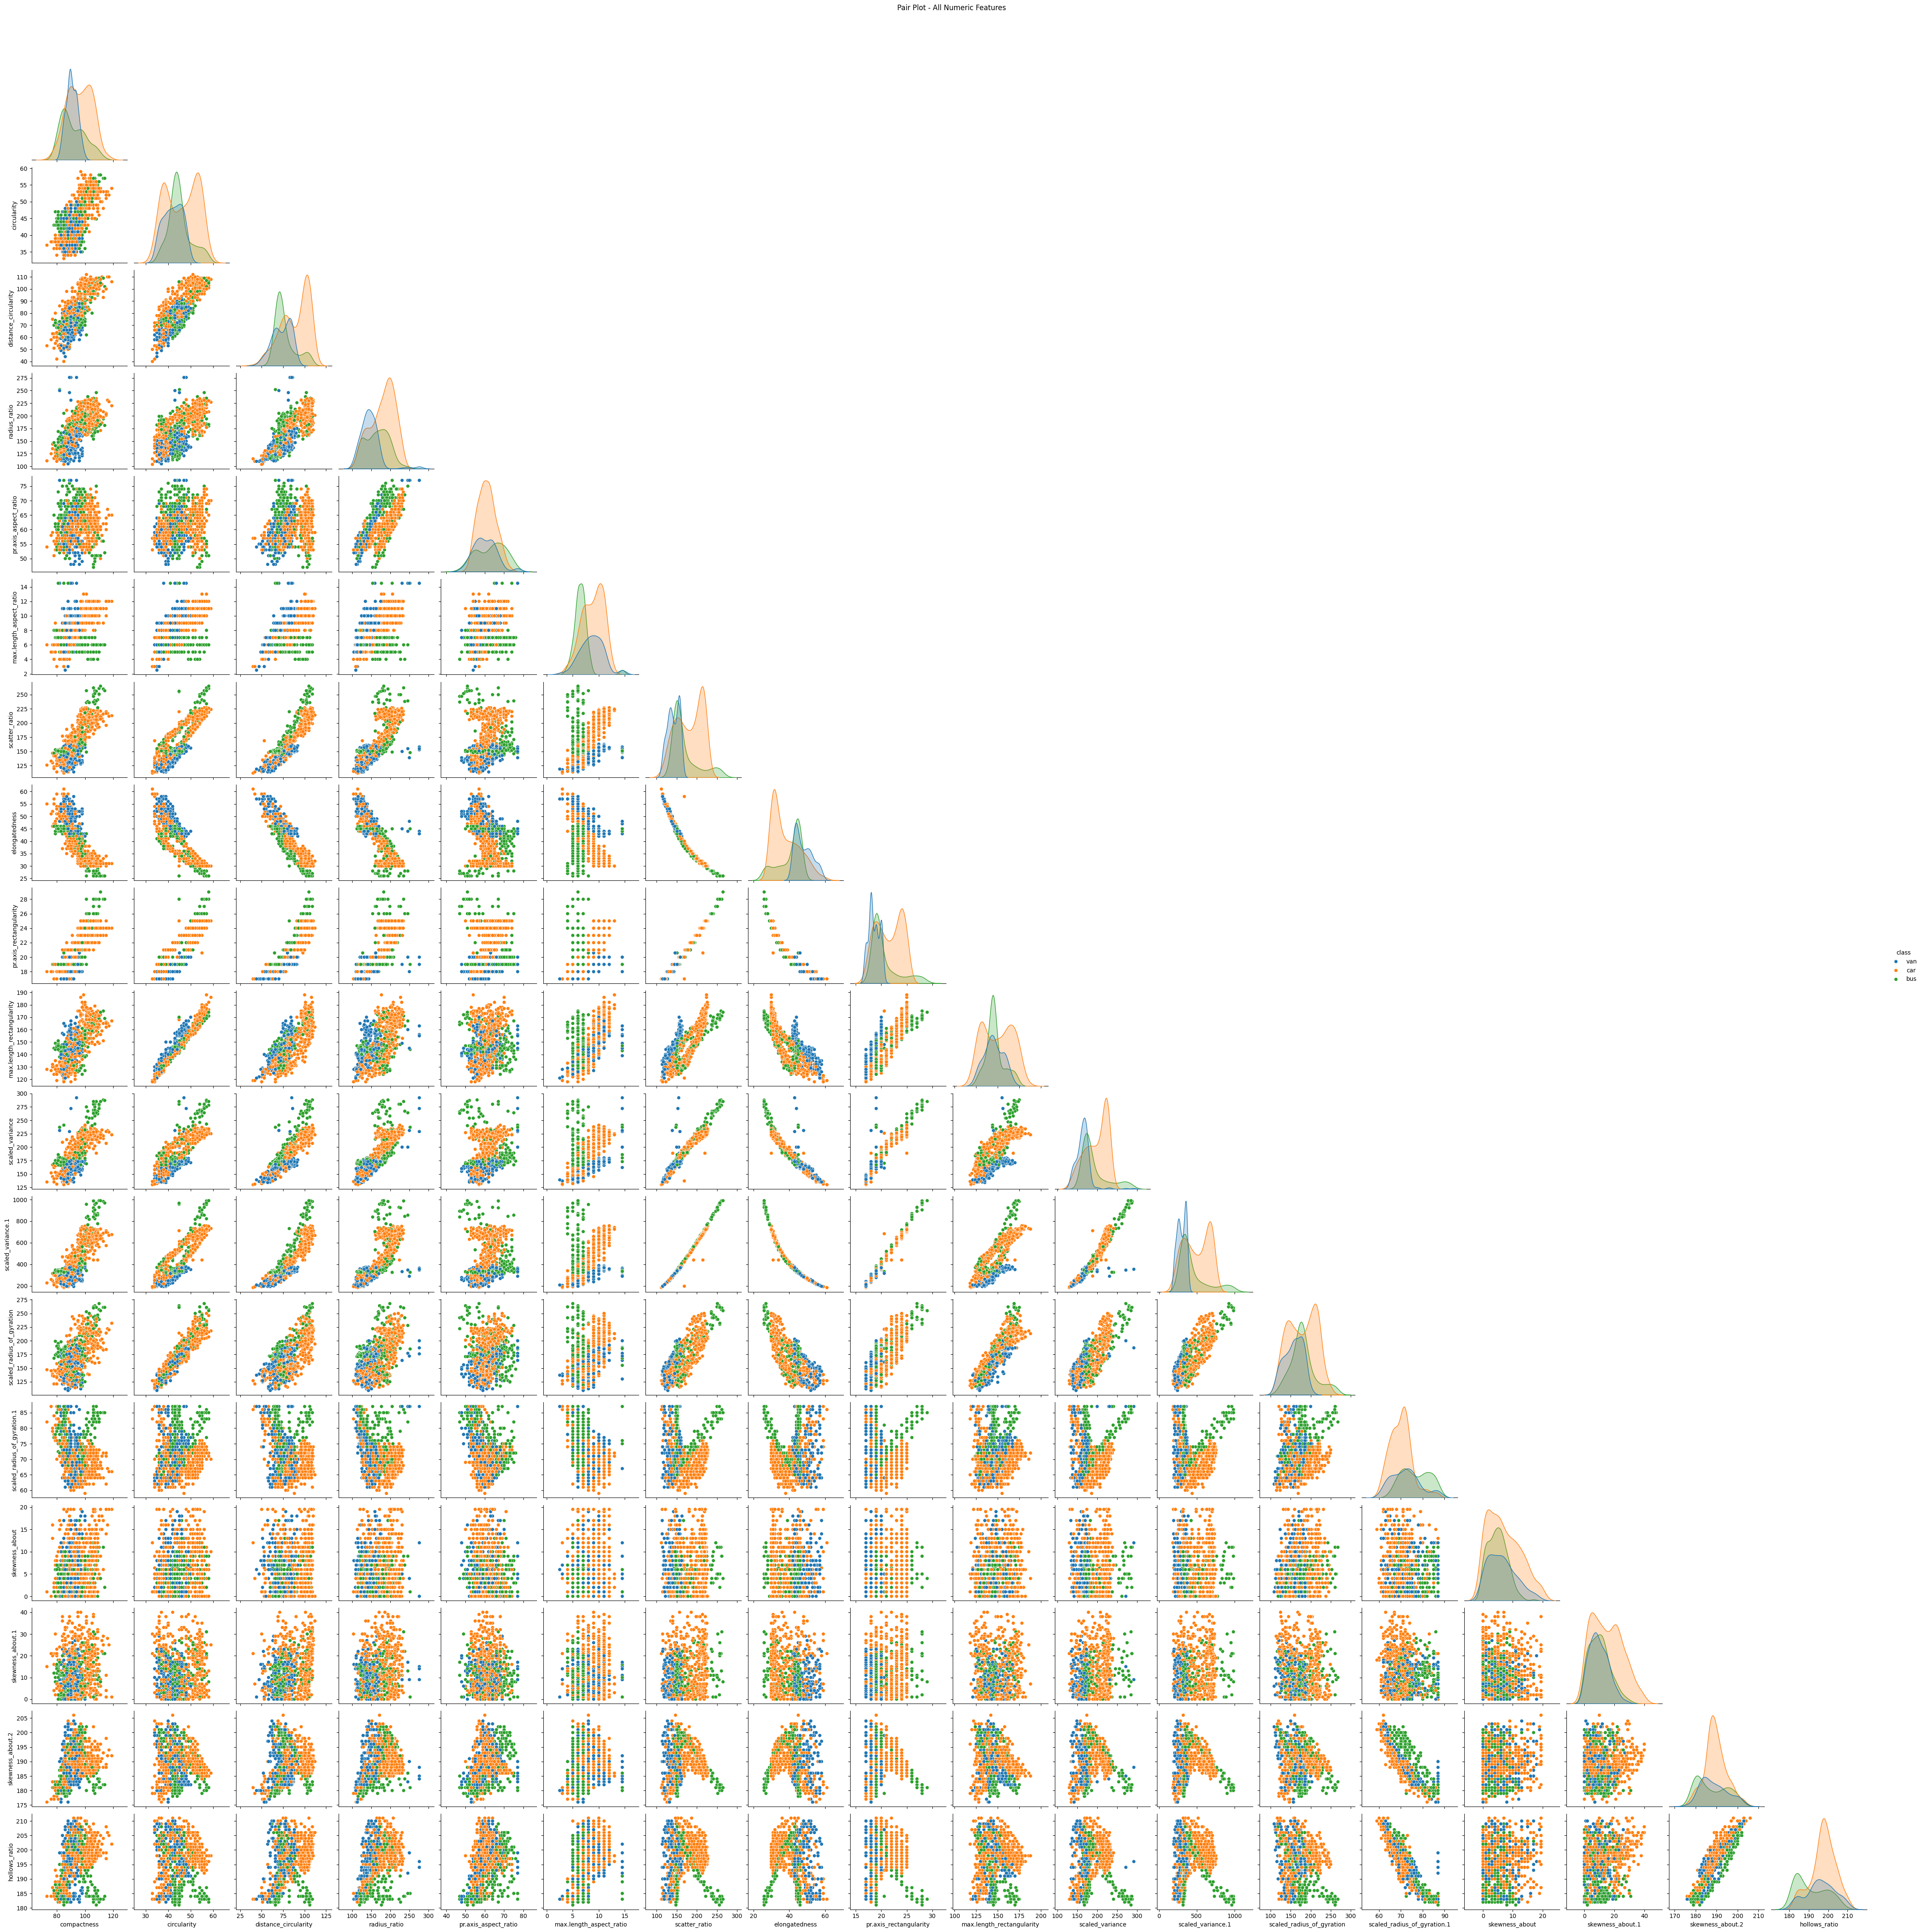

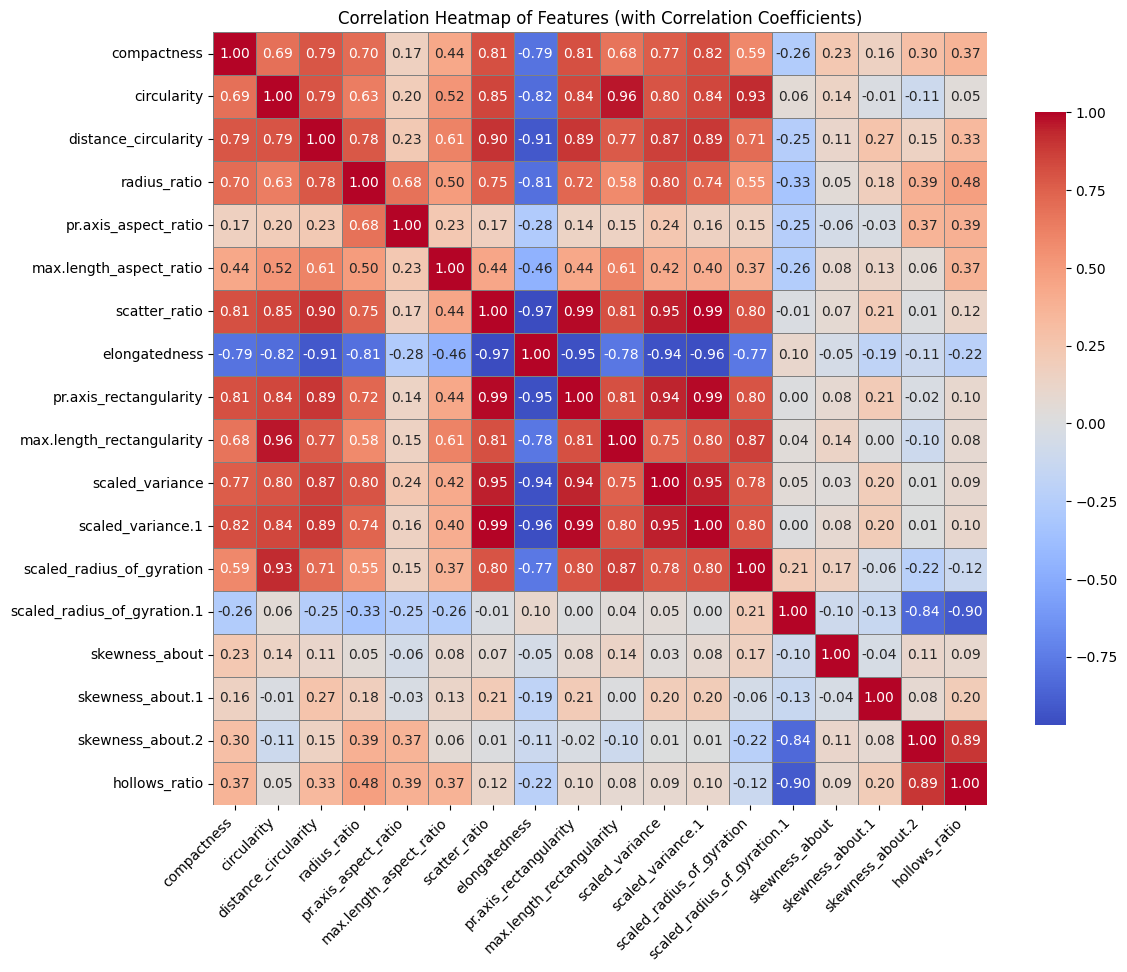

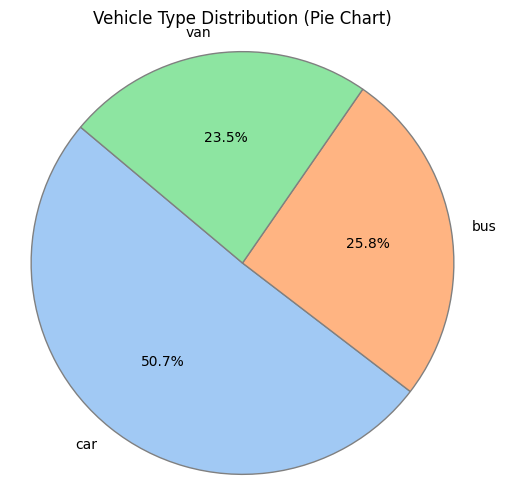

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import os

os.chdir("/Users/lolitha/Desktop/Assignment/Assignment_1")

data = pd.read_csv("vehicles.csv")

#Replace missing values with mean
class_labels = data['class']
data_features = data.drop(columns='class')

imputer = SimpleImputer(strategy='mean')
features_imputed = pd.DataFrame(imputer.fit_transform(data_features), columns=data_features.columns)

vehicles_clean = features_imputed.copy()
vehicles_clean['class'] = class_labels
print(vehicles_clean.shape)

def cap_outliers(col):
    Q1 = np.percentile(col, 25)
    Q3 = np.percentile(col, 75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return np.clip(col, lower, upper)

features_capped = vehicles_clean.drop(columns='class').apply(cap_outliers)
features_capped['class'] = vehicles_clean['class']

# Pair plot for all features
sns.pairplot(features_capped, hue='class', corner=True)
plt.suptitle("Pair Plot - All Numeric Features", y=1.02)
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 10))
corr_matrix = features_capped.drop(columns='class').corr()

sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm',
            linewidths=0.5, linecolor='gray', square=True,
            cbar_kws={'shrink': 0.75})

plt.title("Correlation Heatmap of Features (with Correlation Coefficients)")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Vehicle class distribution
plt.figure(figsize=(6, 6))
class_counts = features_capped['class'].value_counts()

plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140,
        colors=sns.color_palette('pastel'), wedgeprops=dict(edgecolor='gray'))

plt.title("Vehicle Type Distribution (Pie Chart)")
plt.axis('equal')  # Equal aspect ratio ensures it's a perfect circle
plt.show()